In [1]:
from keras.datasets import imdb
(train_data,train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 22s 1us/step


In [3]:
train_data[0], train_labels[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
#words to an integer index.
word_index=imdb.get_word_index()

reverse_word_index=dict(
#Reverses it, mapping integer indices to words
    [(value, key) for (key, value) in word_index.items()])

decoded_review="".join(
#Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
#reserved indices for “padding,” “start of sequence,” and “unknown.”
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [11]:
#Preparing the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

#Vectorized training data
x_train = vectorize_sequences(train_data)
#Vectorized test data
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
#Network Architecture and model definition

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#Learning Process

#Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
#Using custom losses and metrics

from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [17]:
#Validating your approach(Validating Set)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# Training model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 770us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3715 - val_acc: 0.8725
Epoch 2/20
15000/15000 [==============================] - 6s 404us/step - loss: 0.2957 - acc: 0.9048 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 6s 420us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3087 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 6s 407us/step - loss: 0.1742 - acc: 0.9434 - val_loss: 0.2830 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 6s 407us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 6s 400us/step - loss: 0.1143 - acc: 0.9654 - val_loss: 0.3088 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 6s 412us/step -

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

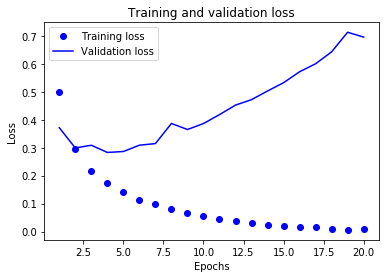

In [21]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#“bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss')

#“b” is for “solid blue line.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

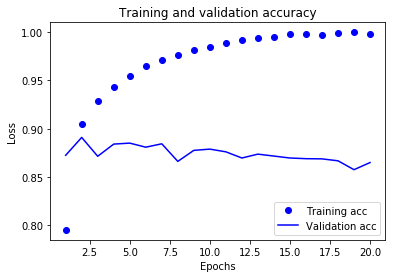

In [25]:
#Plotting the training and validation accuracy

#Clears the figure
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 296us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 7s 276us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 6s 254us/step - loss: 0.1986 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 17s 666us/step


In [27]:
results

[0.32385440501213075, 0.87328]

In [28]:
#Using a trained network to generate predictions on new data

model.predict(x_test)

array([[0.13565382],
       [0.9997113 ],
       [0.2778496 ],
       ...,
       [0.0714213 ],
       [0.04290468],
       [0.47436506]], dtype=float32)